In [ ]:
import pandas as pd

file_path = '/content/creditcard.csv'
df = pd.read_csv(file_path)

# Read the CSV file into a Dataframe
df= pd.read_csv(file_path)

#Print the first 5 rows of the Dataframe
print(df.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


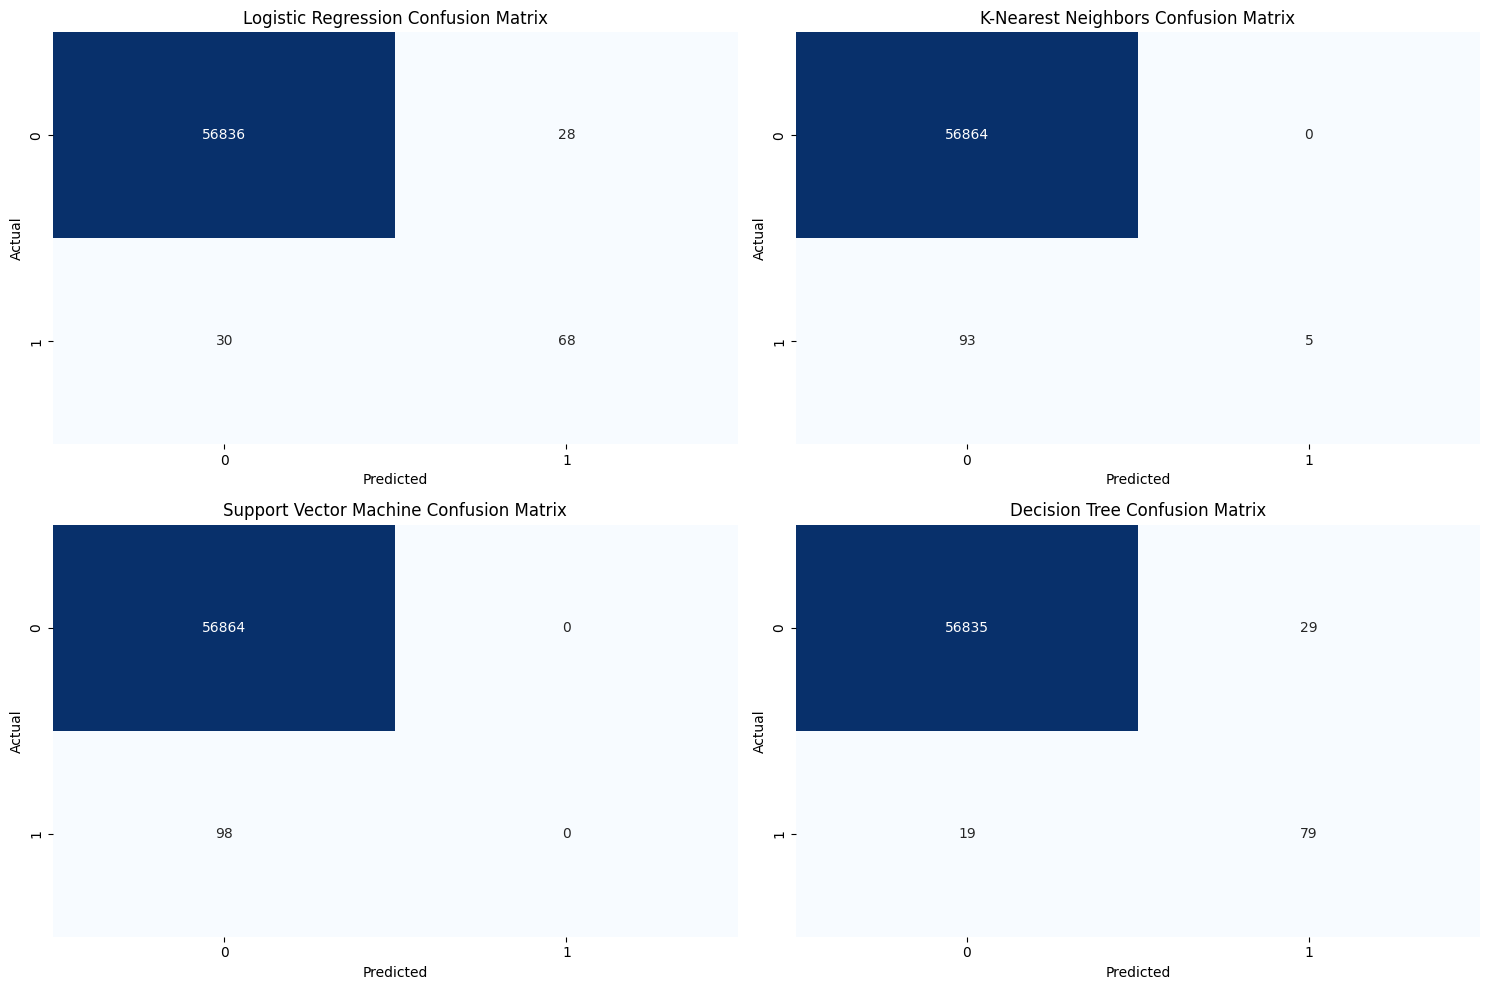

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


# Read the CSV file into a Dataframe
df= pd.read_csv(file_path)

# Features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Step 2 and 3: Train models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

# Step 4: Plot confusion matrices
plt.figure(figsize=(15, 10))

for i, (name, pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


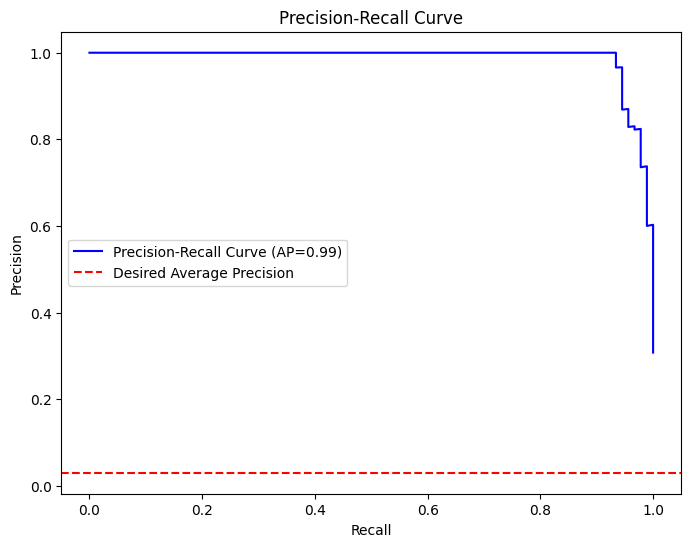

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a Dataframe
df= pd.read_csv(file_path)

# Features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Step 1: Implement under-sampling to balance the classes
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Step 2: Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 3: Train your model on the undersampled data
# For example, using Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Calculate precision, recall, and plot the precision-recall curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (AP={average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.axhline(y=0.03, color='red', linestyle='--', label='Desired Average Precision')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a Dataframe
df= pd.read_csv(file_path)


# Features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features, especially for Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predictions
logistic_regression_pred = logistic_regression_model.predict(X_test_scaled)
knn_pred = knn_model.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)
decision_tree_pred = decision_tree_model.predict(X_test)

# Calculate accuracy scores
logistic_regression_score = accuracy_score(y_test, logistic_regression_pred)
knn_score = accuracy_score(y_test, knn_pred)
svm_score = accuracy_score(y_test, svm_pred)
decision_tree_score = accuracy_score(y_test, decision_tree_pred)

# Print the scores
print(f'Logistic Regression Score: {logistic_regression_score:.4f}')
print(f'K-Nearest Neighbors Score: {knn_score:.4f}')
print(f'Support Vector Machine Score: {svm_score:.4f}')
print(f'Decision Tree Score: {decision_tree_score:.4f}')


Logistic Regression Score: 0.9991
K-Nearest Neighbors Score: 0.9995
Support Vector Machine Score: 0.9993
Decision Tree Score: 0.9990


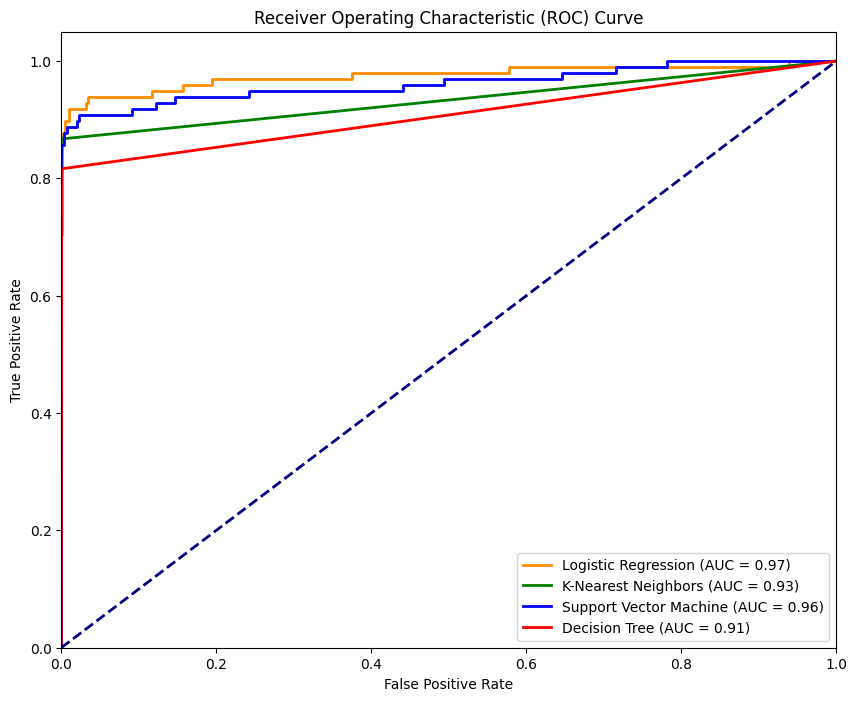

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a Dataframe
df= pd.read_csv(file_path)


# Features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features, especially for Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

svm_model = SVC(probability=True)  # Note: Set probability=True for SVC to enable probability estimates
svm_model.fit(X_train_scaled, y_train)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predictions
logistic_regression_prob = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]
knn_prob = knn_model.predict_proba(X_test_scaled)[:, 1]
svm_prob = svm_model.predict_proba(X_test_scaled)[:, 1]
decision_tree_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_regression_prob)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_prob)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree_prob)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
# Read the CSV file into a Dataframe
df= pd.read_csv(file_path)

# Features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features, especially for Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model (for example, using Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Get classification report
report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'], digits=4)

# Display the classification report
print(report)


              precision    recall  f1-score   support

    No Fraud     0.9993    0.9998    0.9996     56864
       Fraud     0.8636    0.5816    0.6951        98

    accuracy                         0.9991     56962
   macro avg     0.9315    0.7907    0.8473     56962
weighted avg     0.9990    0.9991    0.9990     56962



Data loaded successfully


KeyboardInterrupt: ignored

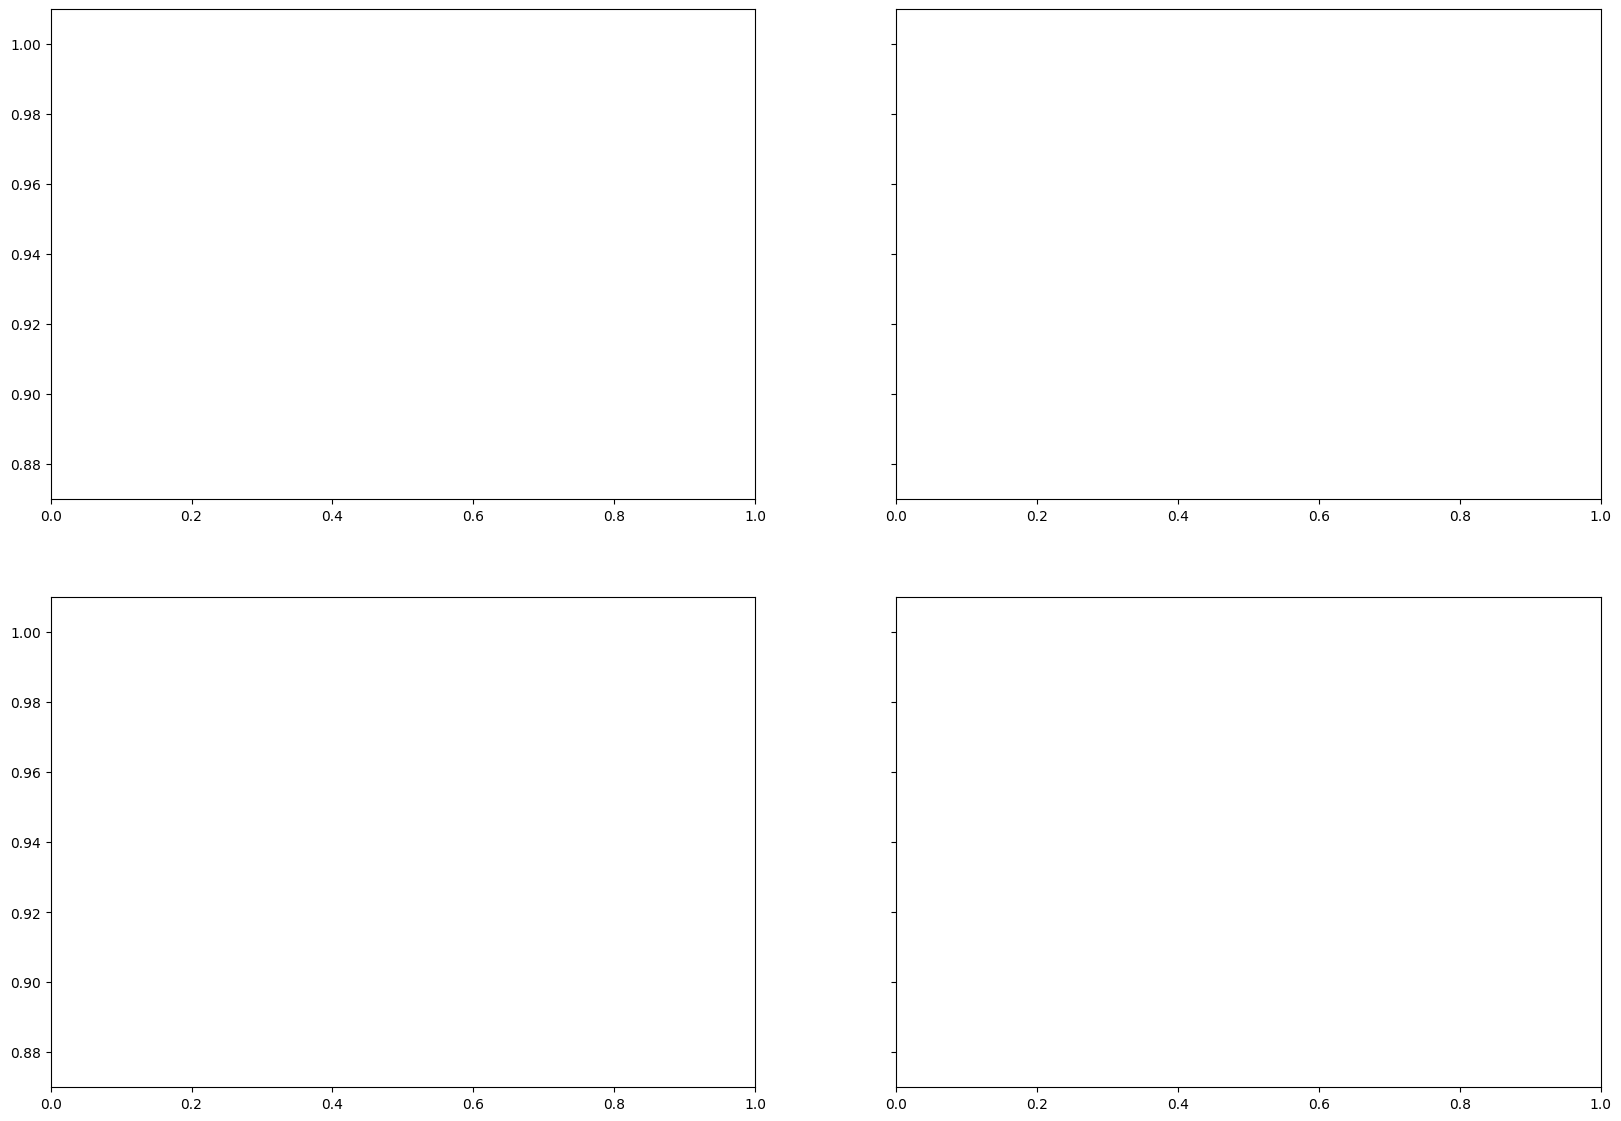

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Read the CSV file into a DataFrame
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)

# Assuming 'df' is your dataset and 'Class' is the target column
X = df.drop('Class', axis=1)
y = df['Class']
print("Data loaded successfully")

log_reg = LogisticRegression()
knears_neighbors = KNeighborsClassifier()
svc = SVC()
tree_clf = DecisionTreeClassifier()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


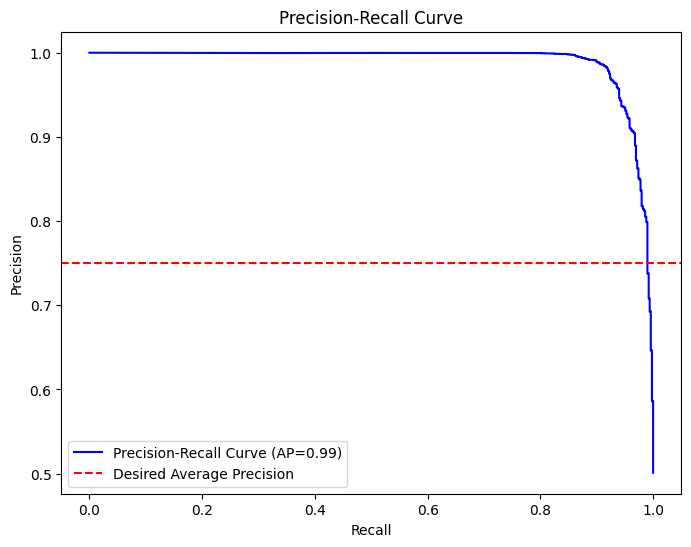

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler


# Features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Step 1: Implement over-sampling to balance the classes
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Step 2: Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 3: Train your model on the oversampled data
# For example, using Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Calculate precision, recall, and plot the precision-recall curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (AP={average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.axhline(y=0.75, color='red', linestyle='--', label='Desired Average Precision')
plt.legend(loc='best')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a DataFrame
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)


# Features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features, especially for Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model (for example, using Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9991
Precision: 0.8636
Recall: 0.5816
F1 Score: 0.6951


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import StandardScaler


# Features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features, especially for Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model (for example, using Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate average precision-recall score
average_precision = average_precision_score(y_test, y_prob)

# Print the average precision-recall score
print(f'Average Precision-Recall Score: {average_precision:.4f}')


Average Precision-Recall Score: 0.7571


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


# Features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features, especially for Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predictions
logistic_regression_pred = logistic_regression_model.predict(X_test_scaled)
knn_pred = knn_model.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)
decision_tree_pred = decision_tree_model.predict(X_test)

# Get classification reports
report_lr = classification_report(y_test, logistic_regression_pred)
report_knn = classification_report(y_test, knn_pred)
report_svm = classification_report(y_test, svm_pred)
report_dt = classification_report(y_test, decision_tree_pred)

# Print the classification reports
print("Logistic Regression Classification Report:")
print(report_lr)

print("\nK-Nearest Neighbors Classification Report:")
print(report_knn)

print("\nSupport Vector Machine Classification Report:")
print(report_svm)

print("\nDecision Tree Classification Report:")
print(report_dt)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     